In [119]:
import pandas as pd
import numpy as np
import twitter
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Using party json file

In [11]:
with open('Data/1mtweets/dutch_only_party_text.json') as data_file:
    data = json.load(data_file)

In [29]:
data['50plus']

{'text': ['@ddstandaard @vvd en #cda verraden de huizenbezitter ook met de aflosboete.\n\n#nieuwsuur @50pluspartij',
  'rt @gerbstruik: ronald van raak, martin bosma en henk krol slaan ollongren om de oren met citaten van pechtold en uit het d66-programma uit…',
  'als @50pluspartij uit de stemwijzer komt, weet je dat je jeugd defintief voorbij is! +punt was dat ik vrijwel niets… https://t.co/cjhiudwnuc',
  'als @50pluspartij uit de stemwijzer komt, weet je dat je jeugd defintief voorbij is! +punt was dat ik vrijwel niets… https://t.co/cjhiudwnuc',
  '@kbo_pcob_geld @loonvoorlater @50pluspartij @cdavandaag @vvd',
  '@groenlinks @d66 @pvda @spnl @pvdd @vvd @cdavandaag @christenunie @50pluspartij @fvdemocratie @sgpnieuws @denknl… https://t.co/hdqu9eehxx',
  '@buurautonl @cdavandaag @vvdduurzaam @d66 @christenunie @partijvddieren @pvda @50pluspartij @fvdemocratie @spnl… https://t.co/hrbfcp6upt',
  'rt @50pluspartij: “50plus vlissingen staat voor goede en bereikbare gezondheidszorg en voor

In [30]:
d = {}
for party in data.keys():
    nrtweets = len(data[party]['text'])
    d[party] = nrtweets
nrparty = pd.Series(d)

In [40]:
nrparty.values

array([  1217,  41449,  13107, 203790,  10166,  96919,  49641,   1218,
         4979,  58585,   7944,  81775,  13182,   8980, 138389], dtype=int64)

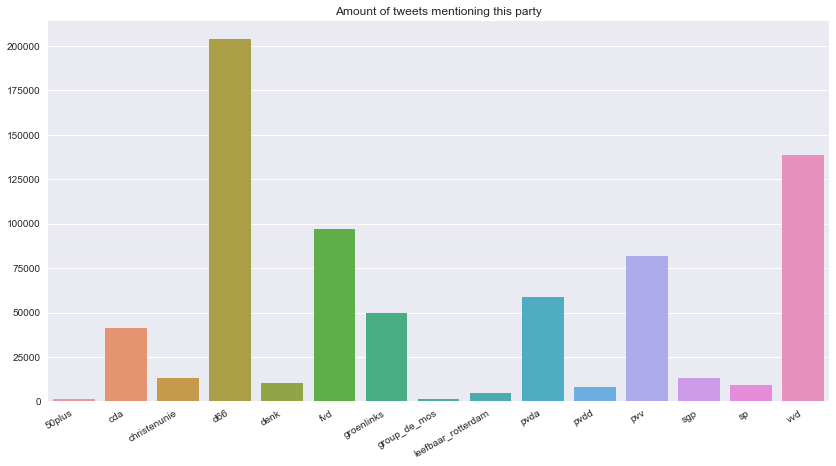

In [46]:
f,ax = plt.subplots(figsize=(14,7))
sns.barplot(x=nrparty.index,y=nrparty.values,ax=ax)
plt.title('Amount of tweets mentioning this party')
plt.setp(ax.get_xticklabels(),rotation=30,horizontalalignment='right')
plt.show()

# Now using a biiig datafile to provide a proof of concept

In [50]:
with open('Data/1mtweets/full_tweets_dutch_only/full_tweet_dutch_only1.json') as data_file:
    data = json.load(data_file)

In [51]:
type(data)

list

In [74]:
data[i]['entities']['user_mentions']['screen_name']

[{'id': 2902821,
  'id_str': '2902821',
  'indices': [68, 78],
  'name': 'De Telegraaf',
  'screen_name': 'telegraaf'},
 {'id': 155507136,
  'id_str': '155507136',
  'indices': [82, 90],
  'name': 'Mark Rutte',
  'screen_name': 'MinPres'}]

In [86]:
nodesset = set()
for entry in data:
    nodesset.add('@' + entry['user']['screen_name'])
    if len(entry['entities']['user_mentions']) != 0:
        for user in entry['entities']['user_mentions']:
                nodesset.add('@' + user['screen_name'])
nodeslist = list(nodesset)

In [117]:
len(nodeslist)

25582

In [90]:
nodesSeries = pd.Series(nodeslist,name = 'Id')

In [97]:
nodedf = pd.DataFrame(nodesSeries)
nodedf['Label'] = nodesSeries
nodedf = nodedf.set_index('Id')

In [98]:
nodedf.to_csv('Data/1mtweets/csv/nodes.csv')

In [113]:
d = {}
for entry in data:
    if len(entry['entities']['user_mentions']) != 0:
        source = '@' + entry['user']['screen_name']
        targetlist = d.get(source,list())
        for user in entry['entities']['user_mentions']:
            targetlist.append('@' + user['screen_name'])
    d[source] = targetlist

In [164]:
len(d.keys())

17129

In [159]:
for source in d.keys():
    series = pd.Series(Counter(d[source]),name='Weight')
    newdf = pd.DataFrame(series)
    newdf['Source'] = source
    newdf.reset_index(inplace=True)
    newdf = newdf.rename(columns={'index':'Target'})
    newdf.set_index('Source')
    try:
        edgedf = pd.concat([edgedf,newdf],axis=0)
    except:
        edgedf = newdf
        print('y')

y


In [168]:
df = df.reset_index().drop('index',axis=1)
df.to_csv('')

In [149]:
df = pd.concat([df,newdf],axis=0)

In [170]:
edgedf = edgedf.reset_index().drop('index',axis=1)

In [176]:
edgedf.to_csv('Data/1mtweets/csv/edges.csv')

In [177]:
edgedf

,Weight,Source
Target,,
@APechtold,3,@UbedaMichel
@AcrisiuS322,1,@UbedaMichel
@D66,2,@UbedaMichel
@Gazendam_Petra,1,@UbedaMichel
@IrEnriqueCortes,1,@UbedaMichel
@JoostNiemoller,1,@UbedaMichel
@KajsaOllongren,1,@UbedaMichel
@MinPres,2,@UbedaMichel
@NEXITIUS,1,@UbedaMichel


In [151]:
testseries = pd.Series(Counter(d['@UbedaMichel']),name='Weight')

In [156]:
df = pd.DataFrame(testseries)
df['Source'] = '@UbedaMichel'
df.reset_index(inplace=True)
df = df.rename(columns={'index':'Target'})
df.set_index('Source')
df

,Target,Weight,Source
0,@APechtold,3,@UbedaMichel
1,@AcrisiuS322,1,@UbedaMichel
2,@D66,2,@UbedaMichel
3,@Gazendam_Petra,1,@UbedaMichel
4,@IrEnriqueCortes,1,@UbedaMichel
5,@JoostNiemoller,1,@UbedaMichel
6,@KajsaOllongren,1,@UbedaMichel
7,@MinPres,2,@UbedaMichel
8,@NEXITIUS,1,@UbedaMichel
9,@NOS,1,@UbedaMichel


In [116]:
len(d.keys())

17129

In [105]:
len(d.keys().unique)

AttributeError: 'dict_keys' object has no attribute 'unique'